Connected to Python 3.13.1

Top 5 countries by GDP:
US: 21354105000000
CN: 14687744162801
JP: 5055587093501.59
DE: 3940142541354.1
IN: 2674851578587.27


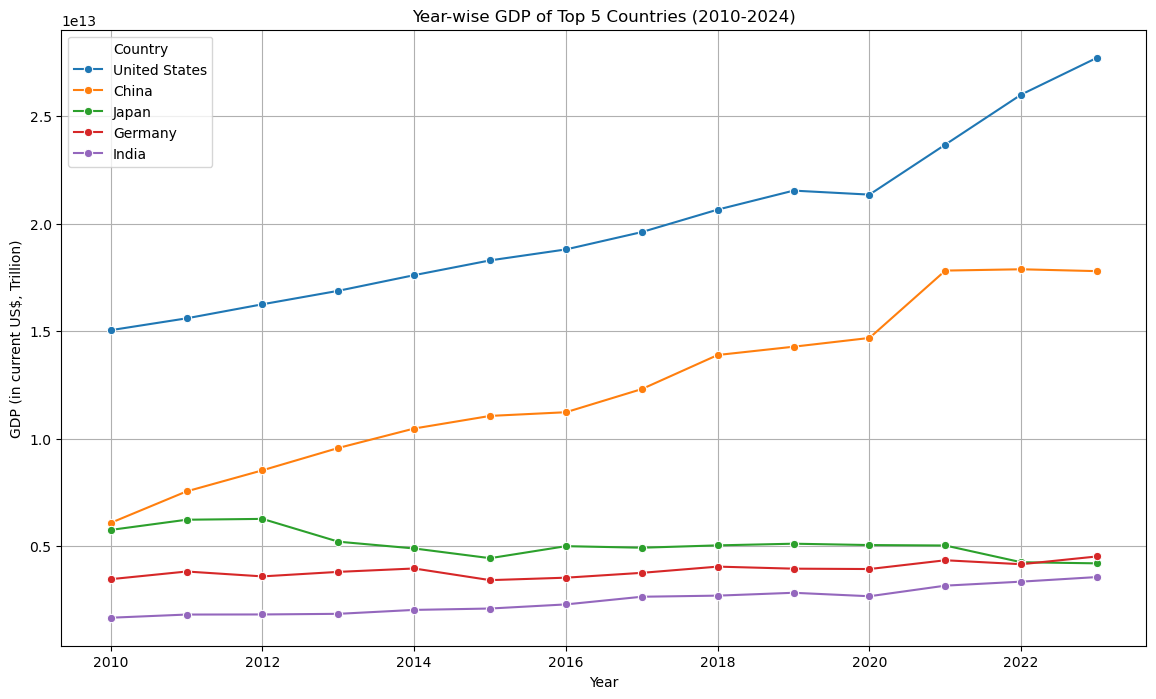

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint


# Base URL for the Free API to fetch GDP data
WORLD_BANK_BASE_URL = "https://api.worldbank.org/v2/country"

# Function to get GDP data for a country
def get_gdp_data(country_code, start_year, end_year):
    url = f"{WORLD_BANK_BASE_URL}/{country_code}/indicator/NY.GDP.MKTP.CD?date={start_year}:{end_year}&format=json"
    response = requests.get(url)
    try:
        data = response.json()
        return data[1]  # Accessing the data part of the response
    except (KeyError, IndexError, ValueError) as e:
        print(f"Error processing GDP data for {country_code}: {e}")
        return None

# Function to process GDP data into a DataFrame
def process_gdp_data(country_code, country_name, start_year, end_year):
    data = get_gdp_data(country_code, start_year, end_year)
    if data:
        df = pd.DataFrame(data)
        df = df[['date', 'value']].rename(columns={'date': 'year', 'value': 'gdp'})
        df['country'] = country_name
        df['year'] = df['year'].astype(int)
        df['gdp'] = df['gdp'].astype(float)
        return df
    else:
        return pd.DataFrame()

country_codes = ["US", "CN", "JP", "DE", "IN"]



# Get GDP data for all countries and find the top 5
gdp_data = {}
for country_code in country_codes:
    gdp_value = get_gdp_data(country_code, 2020, 2024)  # Get GDP value for the latest year available
    if gdp_value:
        # Extract the latest GDP value
        latest_gdp = gdp_value[-1]['value']
        gdp_data[country_code] = latest_gdp

# Sort countries by GDP and get the top 5
top_countries = dict(sorted(gdp_data.items(), key=lambda item: item[1], reverse=True)[:5])

# Print the top 5 countries by GDP
print("Top 5 countries by GDP:")

for code, gdp in top_countries.items():
    print(f"{code}: {gdp}")

# Mapping country codes to country names
country_names = {
    'US': 'United States',
    'CN': 'China',
    'JP': 'Japan',
    'DE': 'Germany',
    'IN': 'India'
}

# Filter top countries with their names
top_countries = {code: country_names[code] for code in top_countries.keys()}

# Fetch and combine GDP data for all top countries
gdp_combined_df = pd.DataFrame()

for country_code, country_name in top_countries.items():
    country_gdp_df = process_gdp_data(country_code, country_name, 2010, 2024)
    gdp_combined_df = pd.concat([gdp_combined_df, country_gdp_df], ignore_index=True)

# # Display the combined GDP data
# print("Combined GDP Data:")
# print(gdp_combined_df.head())

# Plot the combined GDP data
if not gdp_combined_df.empty and 'year' in gdp_combined_df.columns and 'gdp' in gdp_combined_df.columns:
    plt.figure(figsize=(14, 8))
    sns.lineplot(x='year', y='gdp', hue='country', data=gdp_combined_df, marker='o')
    plt.title('Year-wise GDP of Top 5 Countries (2010-2024)')
    plt.xlabel('Year')
    plt.ylabel('GDP (in current US$, Trillion)')
    plt.legend(title='Country')
    plt.grid(True)
    plt.show()
else:
    print("Error: Dataframe is empty or missing required columns.")


In [4]:
import requests
import pandas as pd  # Ensure pandas is imported

# Function to get lithium production data from KAPSARC Data Portal API
def get_lithium_production_data(api_key):
    url = "https://datasource.kapsarc.org/api/records/1.0/search/"  # Corrected endpoint

    
    params = {
        "dataset": "production-of-lithium-minerals",
        "rows": 100,
        "sort": "production",
        "apikey": api_key
    }
    response = requests.get(url, params=params)

    # Check the response status code
    if response.status_code == 200:
        try:
            data = response.json()
            return data
        except ValueError as e:
            print("JSONDecodeError:", e)
            return None
    else:
        print("Error: Failed to fetch data. Status code:", response.status_code)
        return None

# Replace with your actual API key
api_key = "50a6eea32c6cf352fce43ee4d4a201a82bebe15887f5c3068c9fc15c"

# Get lithium production data
lithium_data = get_lithium_production_data(api_key)

# Convert the relevant part of the dictionary into a DataFrame
if lithium_data and 'records' in lithium_data:
    records = lithium_data['records']
    df = pd.json_normalize(records)
    
    # Extract relevant fields
    df_extracted = df[['datasetid', 'fields.country', 'fields.year', 'fields.production']]
    
    # Display the extracted DataFrame
    print("Extracted Lithium Production Data:")
    print(df_extracted.to_string(index=False))
else:
    print("No data to display or 'records' key not found.")


Extracted Lithium Production Data:
                     datasetid fields.country fields.year  fields.production
production-of-lithium-minerals      Australia        2022          2754727.0
production-of-lithium-minerals      Australia        2021          1966744.0
production-of-lithium-minerals      Australia        2018          1965912.0
production-of-lithium-minerals      Australia        2017          1706619.0
production-of-lithium-minerals      Australia        2019          1588263.0
production-of-lithium-minerals      Australia        2020          1477240.0
production-of-lithium-minerals      Australia        2016           522181.0
production-of-lithium-minerals      Australia        2012           452921.0
production-of-lithium-minerals      Australia        2014           444546.0
production-of-lithium-minerals      Australia        2015           439514.0
production-of-lithium-minerals      Australia        2013           405119.0
production-of-lithium-minerals      Austr

In [5]:
# Check if the DataFrame is not empty and create a list of top lithium-producing countries
if not df_extracted.empty:
    top_lithium_producers = df_extracted.groupby('fields.country')['fields.production'].sum().sort_values(ascending=False)
    top_lithium_producers_list = top_lithium_producers.index.tolist()
    print("Top Lithium-Producing Countries List:")
    print(top_lithium_producers_list)
else:
    top_lithium_producers_list = []
    print("No data available to list top lithium-producing countries.")


Top Lithium-Producing Countries List:
['Australia', 'Chile', 'Soviet Union', 'Zimbabwe', 'Namibia', 'Brazil', 'China', 'Portugal', 'Canada', 'Argentina']


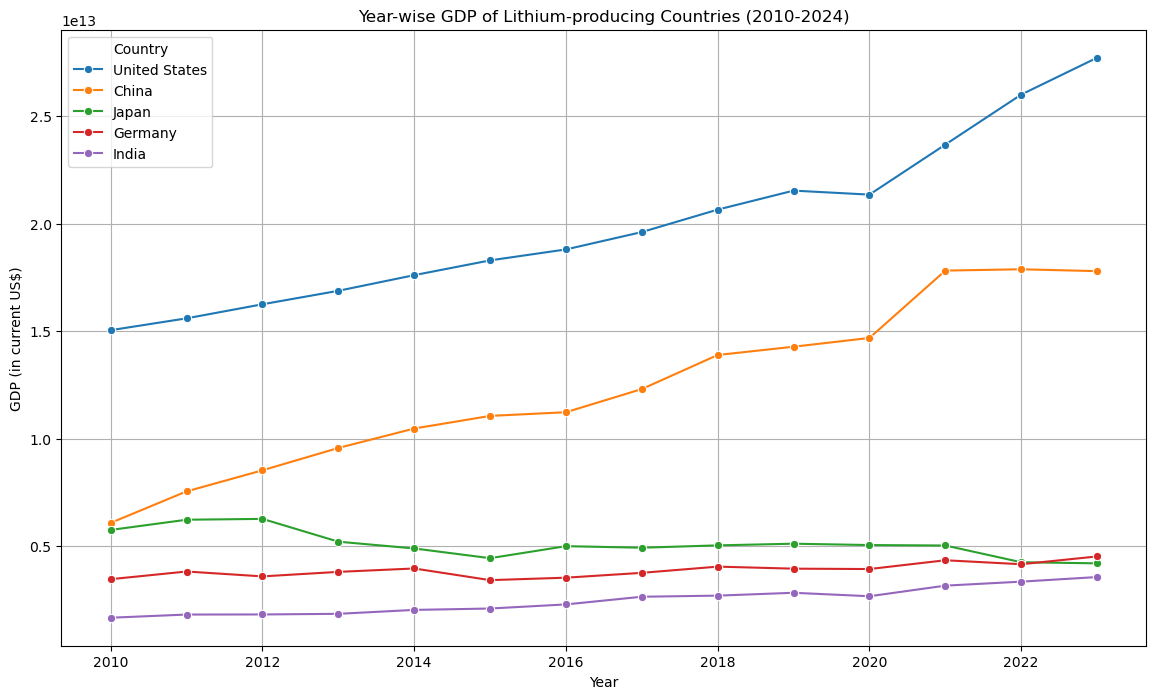

In [6]:
# Plot the combined GDP data
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='gdp', hue='country', data=gdp_combined_df, marker='o')
plt.title('Year-wise GDP of Lithium-producing Countries (2010-2024)')
plt.xlabel('Year')
plt.ylabel('GDP (in current US$)')
plt.legend(title='Country')
plt.grid(True)
plt.show()



Projected GDP Growth for Lithium-Producing Countries (Next 5 Years):
      country  year  projected_gdp
0   Australia  2024   1.790828e+12
1   Australia  2025   1.855878e+12
2   Australia  2026   1.923292e+12
3   Australia  2027   1.993154e+12
4   Australia  2028   2.065554e+12
5       Chile  2024   3.484368e+11
6       Chile  2025   3.618366e+11
7       Chile  2026   3.757516e+11
8       Chile  2027   3.902018e+11
9       Chile  2028   4.052077e+11
10      China  2024   1.937014e+13
11      China  2025   2.108496e+13
12      China  2026   2.295160e+13
13      China  2027   2.498348e+13
14      China  2028   2.719525e+13
15  Argentina  2024   6.749325e+11
16  Argentina  2025   7.050787e+11
17  Argentina  2026   7.365714e+11
18  Argentina  2027   7.694707e+11
19  Argentina  2028   8.038395e+11
20     Brazil  2024   2.192101e+12
21     Brazil  2025   2.210693e+12
22     Brazil  2026   2.229442e+12
23     Brazil  2027   2.248351e+12
24     Brazil  2028   2.267420e+12


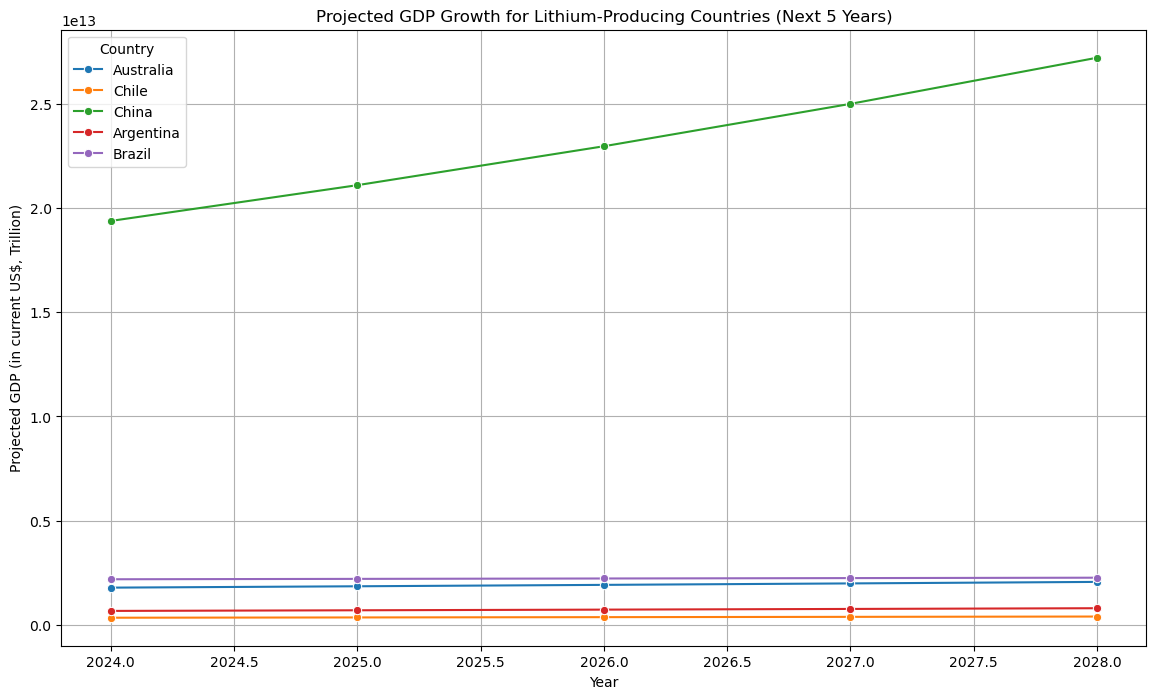

In [7]:
import requests
import pandas as pd
import numpy as np

# Base URL for the World Bank API
WORLD_BANK_BASE_URL = "https://api.worldbank.org/v2/country"

# Function to get historical GDP data for a country
def get_gdp_data(country_code, start_year, end_year):
    url = f"{WORLD_BANK_BASE_URL}/{country_code}/indicator/NY.GDP.MKTP.CD?date={start_year}:{end_year}&format=json"
    response = requests.get(url)
    try:
        data = response.json()
        return data[1]  # Accessing the data part of the response
    except (KeyError, IndexError, ValueError) as e:
        print(f"Error processing GDP data for {country_code}: {e}")
        return None

# Function to process GDP data into a DataFrame and calculate growth rate
def process_gdp_data(country_code, country_name, start_year, end_year):
    data = get_gdp_data(country_code, start_year, end_year)
    if data:
        df = pd.DataFrame(data)
        df = df[['date', 'value']].rename(columns={'date': 'year', 'value': 'gdp'})
        df['year'] = df['year'].astype(int)
        df['gdp'] = df['gdp'].astype(float)
        df = df.sort_values(by='year')
        df['growth_rate'] = df['gdp'].pct_change() * 100  # Calculate annual growth rate
        return df
    else:
        return pd.DataFrame()

# List of lithium-producing countries and their country codes
lithium_producing_countries = {
    'Australia': 'AU',
    'Chile': 'CL',
    'China': 'CN',
    'Argentina': 'AR',
    'Brazil': 'BR'
}

# Fetch and process GDP data for each country
start_year = 2010
end_year = 2024
projection_years = 5

gdp_data_combined = pd.DataFrame()

for country_name, country_code in lithium_producing_countries.items():
    df = process_gdp_data(country_code, country_name, start_year, end_year)
    if not df.empty:
        df['country'] = country_name
        gdp_data_combined = pd.concat([gdp_data_combined, df], ignore_index=True)

# Calculate average growth rate for each country and project future GDP
projections = []

for country_name in lithium_producing_countries.keys():
    df_country = gdp_data_combined[gdp_data_combined['country'] == country_name]
    if not df_country.empty:
        avg_growth_rate = df_country['growth_rate'].mean(skipna=True)
        latest_gdp = df_country['gdp'].iloc[-1]
        projection_years_range = np.arange(end_year, end_year + projection_years)
        
        for year in projection_years_range:
            projected_gdp = latest_gdp * ((1 + avg_growth_rate / 100) ** (year - end_year + 1))
            projections.append({
                'country': country_name,
                'year': year,
                'projected_gdp': projected_gdp
            })

# Convert projections to DataFrame and display
projections_df = pd.DataFrame(projections)
print("Projected GDP Growth for Lithium-Producing Countries (Next 5 Years):")
print(projections_df)

# Plotting (optional)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='projected_gdp', hue='country', data=projections_df, marker='o')
plt.title('Projected GDP Growth for Lithium-Producing Countries (Next 5 Years)')
plt.xlabel('Year')
plt.ylabel('Projected GDP (in current US$, Trillion)')
plt.legend(title='Country')
plt.grid(True)
plt.show()
